# Reserach data 
### Additional Dataset Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Import Data

In [4]:
import pandas as pd

bank_data = pd.read_csv("Data/bank-additional/bank-additional/bank-additional.csv", delimiter=";") #all examples 100%

bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Data Prep

In [5]:
# Preprocessing

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# PP target
bank_target = bank_data['y']
bank_preprocessed = bank_data.drop(columns='y')

label_encoder = preprocessing.LabelEncoder()
bank_target = label_encoder.fit_transform(bank_target) # encoded in 0 / 1


preprocessor = preprocessing.OneHotEncoder()
estimator = KNeighborsClassifier(n_neighbors=4)
# preprocessor = ColumnTransformer(
#     transformers=[
#         # use StandardScaler for Temperature and Humidity
#         ('scaler', StandardScaler(), ['Temperature', 'Humidity']),
#         # use OneHotEncoder for Outlook and Wind
#         ('encoder', OneHotEncoder(), ['Outlook', 'Wind']) ])

# encoded = pd.DataFrame(data_encoder.fit_transform(bank_preprocessed[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]).toarray(),columns=encoder.get_feature_names_out(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']))

# bank_preprocessed = bank_preprocessed.drop(columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
# bank_preprocessed = pd.concat([bank_preprocessed,encoded],axis=1)
# bank_preprocessed.head()

pipeline = Pipeline([('preprocessing', preprocessor), ('classification', estimator)])


### First Trys

For KNN with n = 1 Average Accuracy = 85.04488224316728% , Best Accuarcy = 87.13592233009709
For KNN with n = 1 Average Recall = 25.033816425120776% , Best Recall = 35.55555555555556
For KNN with n = 2 Average Accuracy = 89.39066449342121% , Best Accuarcy = 90.53398058252428
For KNN with n = 2 Average Recall = 11.97584541062802% , Best Recall = 20.0
For KNN with n = 3 Average Accuracy = 88.73514752084664% , Best Accuarcy = 90.0485436893204
For KNN with n = 3 Average Recall = 20.159420289855074% , Best Recall = 28.26086956521739
For KNN with n = 4 Average Accuracy = 89.70619847400376% , Best Accuarcy = 90.53398058252428
For KNN with n = 4 Average Recall = 12.193236714975846% , Best Recall = 17.77777777777778
For KNN with n = 5 Average Accuracy = 89.29357711478045% , Best Accuarcy = 90.77669902912622
For KNN with n = 5 Average Recall = 17.06280193236715% , Best Recall = 22.22222222222222
For KNN with n = 6 Average Accuracy = 89.56050835045947% , Best Accuarcy = 90.29126213592234
For KNN 

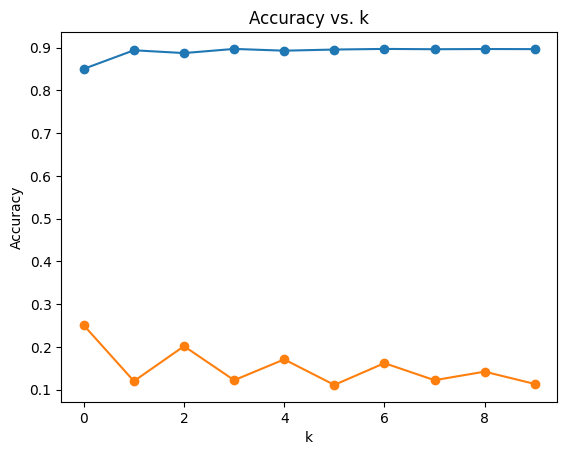

In [72]:
#General approach with Model evaluation.. Recall or Precision?
#F1 & accuracy always, we can include a cost example for r & p
#r: how many potential customers to I miss (which were actually using the account)
#p: What percentage of the selected customers actually use an account like that
from sklearn.model_selection import cross_val_score

accuracy_scores = []
recall_scores = []

for n in range(10):
    estimator = KNeighborsClassifier(n_neighbors=n+1)
    accuracy = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("For KNN with n = {} Average Accuracy = {}% , Best Accuarcy = {}".format(n+1, accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    recall = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='recall')
    print("For KNN with n = {} Average Recall = {}% , Best Recall = {}".format(n+1, recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(range(10), accuracy_scores, marker='o')
plt.plot(range(10), recall_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()